# Import modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from figure_functions import plot_trajectory
from utils import wrapToPi

# Load trajectory dataset and PFN prediction dataset

In [3]:
stimuli = pd.read_csv('real-wvg-like_withHeadingPredictor_yesdownsample_fixedFlyRef1_stims_all.csv')

In [4]:
PFNdata = pd.read_csv('ANN-PFNinputs_real-wvg-like_withHeadingPredictor_yesdownsample_fixedFlyRef1_all_goodorder.csv')

In [5]:
stim_list = [stimuli[stimuli.obj_id==i] for i in np.unique(stimuli.obj_id)]

In [6]:
PFN_list = [PFNdata[PFNdata.obj_id==i] for i in np.unique(PFNdata.obj_id)]

In [7]:
stimuli.columns

Index(['Unnamed: 0', 'samplenum', 'time', 'obj_id', 'heading', 'course_dir',
       'airspeed', 'gamma', 'gspd', 'psi', 'zeta', 'wspd', 'altitude', 'fspd',
       'thrust', 'thrust_angle', 'torque', 'xpos', 'ypos', 'vpara_input',
       'vperp_input', 'phi_input'],
      dtype='object')

# Choose a trajectory to plot

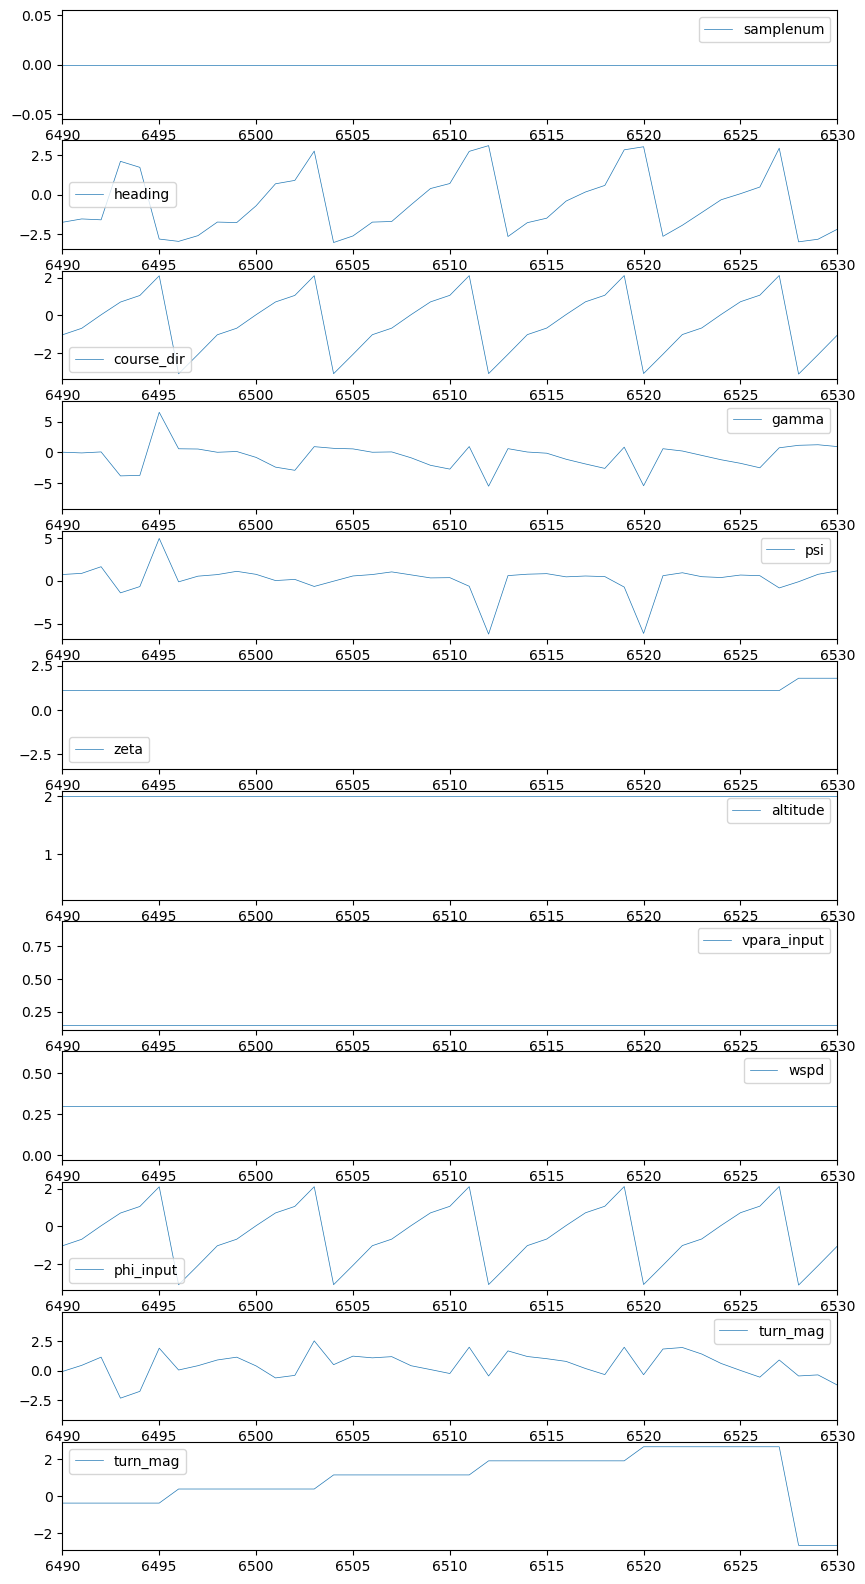

In [255]:
cols = ['samplenum','heading','course_dir',
        'gamma','psi','zeta','altitude',
        'vpara_input','wspd','phi_input']

fig,ax = plt.subplots(len(cols)+2,1,figsize=(10,len(cols)*2))
for c in range(len(cols)):
    ax[c].plot(np.array(stimuli[stimuli.samplenum==0][cols[c]]),label=cols[c],linewidth=0.5)
    ax[c].legend();
    ax[c].set_xlim(6490,6530)
ax[c+1].plot(np.array(stimuli[stimuli.samplenum==50]['heading'])-np.array(stimuli[stimuli.samplenum==0]['heading']),label='turn_mag',linewidth=0.5)
ax[c+1].legend();
ax[c+1].set_xlim(6490,6530);
ax[c+2].plot(np.array(stimuli[stimuli.samplenum==50]['course_dir'])-np.array(stimuli[stimuli.samplenum==0]['course_dir']),label='turn_mag',linewidth=0.5)
ax[c+2].legend();
ax[c+2].set_xlim(6490,6530);


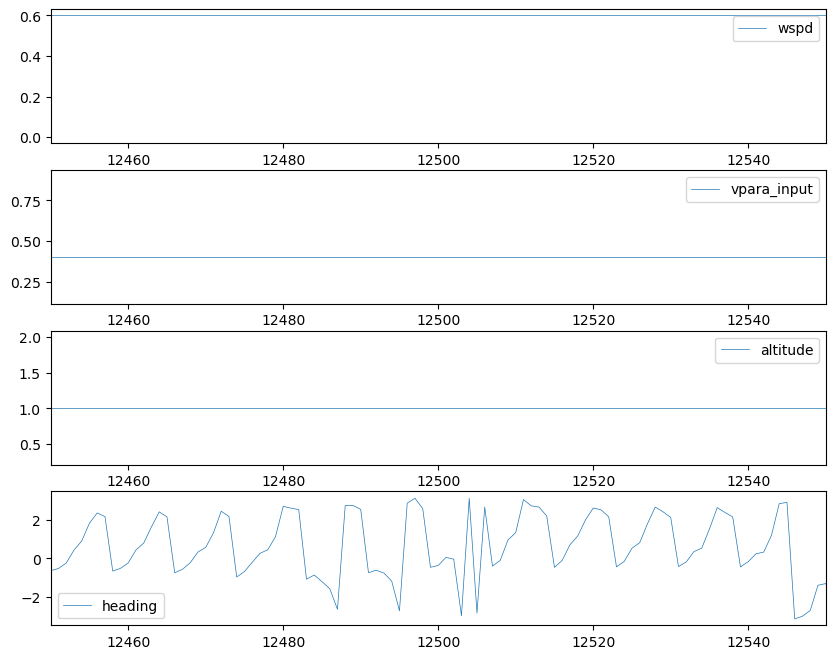

In [196]:
cols = ['wspd','vpara_input','altitude','heading']

fig,ax = plt.subplots(len(cols),1,figsize=(10,len(cols)*2))
for c in range(len(cols)):
    ax[c].plot(np.array(stimuli[stimuli.samplenum==0][cols[c]]),label=cols[c],linewidth=0.5)
    ax[c].legend();
    ax[c].set_xlim(12450,12550)

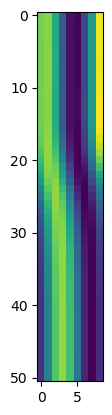

In [256]:
## choose a stimulus

n = 6521
fig,ax = plt.subplots()
ax.imshow(PFN_list[n].iloc[:,3:12])
a = stim_list[n].zeta.iloc[0]

In [266]:
b = wrapToPi(np.array([-a-np.pi]))

In [267]:
b*180/np.pi

array([117.7081431])

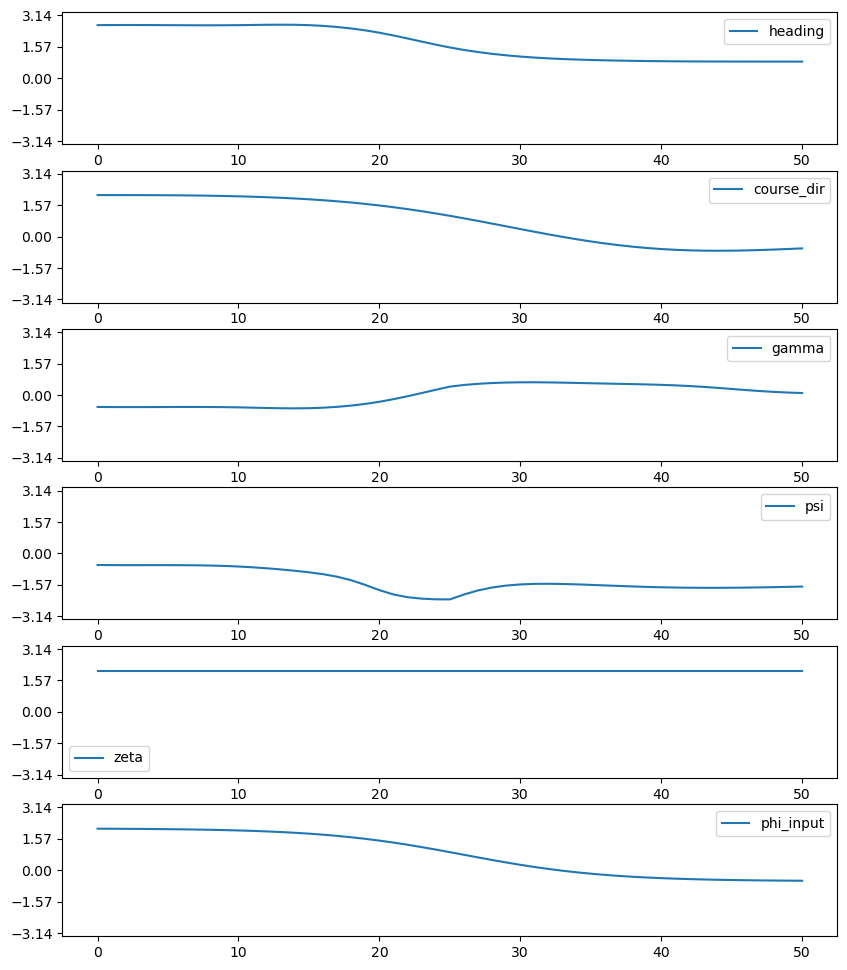

In [259]:
cols = ['heading','course_dir',
        'gamma','psi','zeta',
        'phi_input']

fig,ax = plt.subplots(len(cols),1,figsize=(10,len(cols)*2))
for c in range(len(cols)):
    if cols[c]=='zeta':
        ax[c].plot(wrapToPi(np.array(-stim_list[n][cols[c]])-np.pi),label=cols[c]);
    else:
        ax[c].plot(wrapToPi(np.array(-stim_list[n][cols[c]])),label=cols[c]);
    ax[c].set_ylim(-3.3,3.3)
    ax[c].set_yticks([-3.14,-1.57,0,1.57,3.14])
    ax[c].legend();

plt.savefig('example_trajectory_real-wvg-like_no'+str(n)+'_angles.svg')

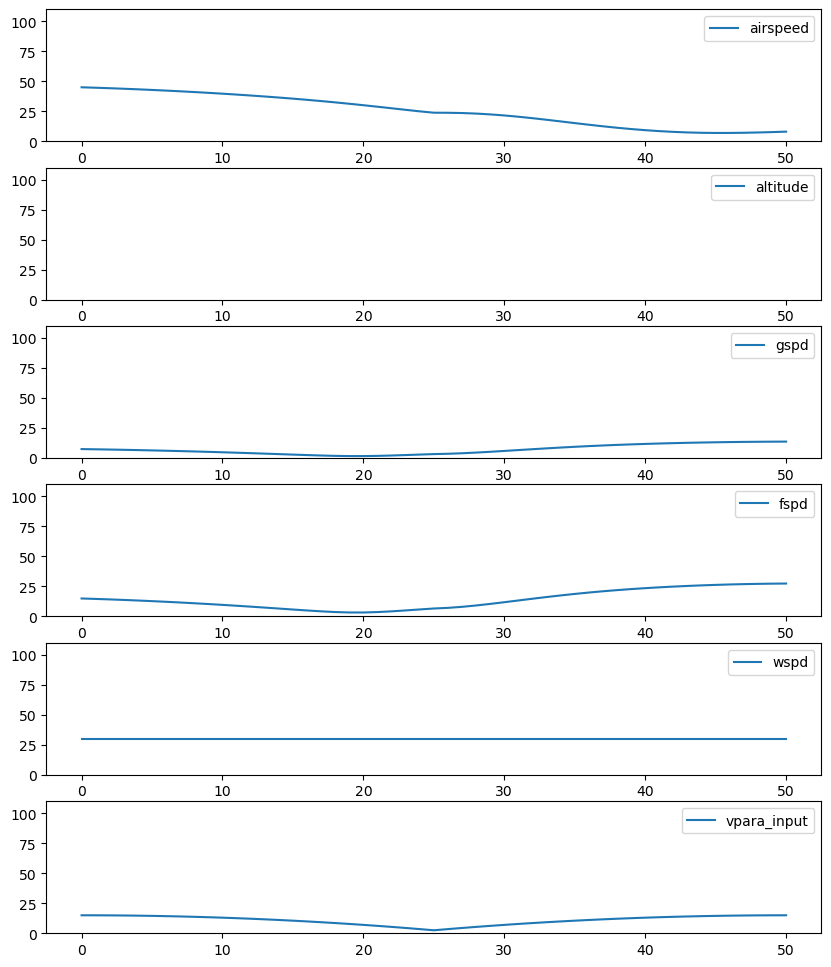

In [260]:
cols = ['airspeed','altitude','gspd','fspd','wspd','vpara_input']

fig,ax = plt.subplots(len(cols),1,figsize=(10,len(cols)*2))
for c in range(len(cols)):
    ax[c].plot(100*wrapToPi(np.array(stim_list[n][cols[c]])),label=cols[c]);
    ax[c].set_ylim(0,110)
    ax[c].set_yticks([0,25,50,75,100])
    ax[c].legend();

plt.savefig('example_trajectory_real-wvg-like_no'+str(n)+'_magnitudes.svg')

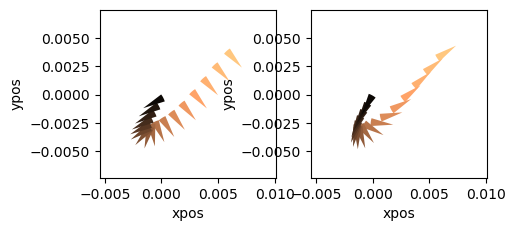

In [261]:
fig,ax = plt.subplots(1,2,figsize=(5,3))
plot_trajectory(xpos=stim_list[n].xpos.values,ypos=stim_list[n].ypos.values,
                phi=stim_list[n].heading.values,color=stim_list[n].time.values,ax=ax[0],
                colormap='copper',size_radius=0.002,nskip=2)
ax[0].set_xlabel('xpos')
ax[0].set_ylabel('ypos');
plot_trajectory(xpos=stim_list[n].xpos.values,ypos=stim_list[n].ypos.values,
                phi=stim_list[n].course_dir.values,color=stim_list[n].time.values,ax=ax[1],
                colormap='copper',size_radius=0.002,nskip=2)
ax[1].set_xlabel('xpos')
ax[1].set_ylabel('ypos');

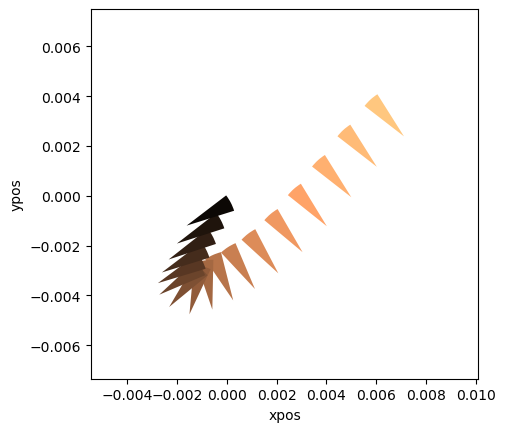

In [270]:
fig,ax = plt.subplots()
pos = plot_trajectory(xpos=stim_list[n].xpos.values,ypos=stim_list[n].ypos.values,
                phi=stim_list[n].heading.values,color=stim_list[n].time.values,ax=ax,
                colormap='copper',size_radius=0.002,nskip=2)
ax.set_xlabel('xpos')
ax.set_ylabel('ypos');
plt.savefig('example_trajectory_real-wvg-like_no'+str(n)+'.svg')

In [273]:
import matplotlib as mpl

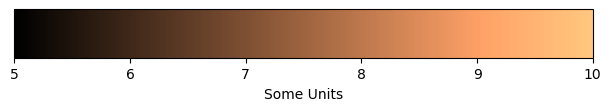

In [275]:
fig, ax = plt.subplots(figsize=(6, 1), layout='constrained')

cmap = mpl.cm.copper
norm = mpl.colors.Normalize(vmin=5, vmax=10)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Some Units')
plt.savefig('copper_colorbar.svg')

# Plot PFN activity during trajectory

In [264]:
EPG_start = 3
EPG_end = 10+1
PFNd_start = 11
PFNd_end = 26+1
PFNv_start = 27
PFNv_end = 42+1
PFNpc_start = 43
PFNpc_end = 58+1
PFNa_start = 59
PFNa_end = 74+1

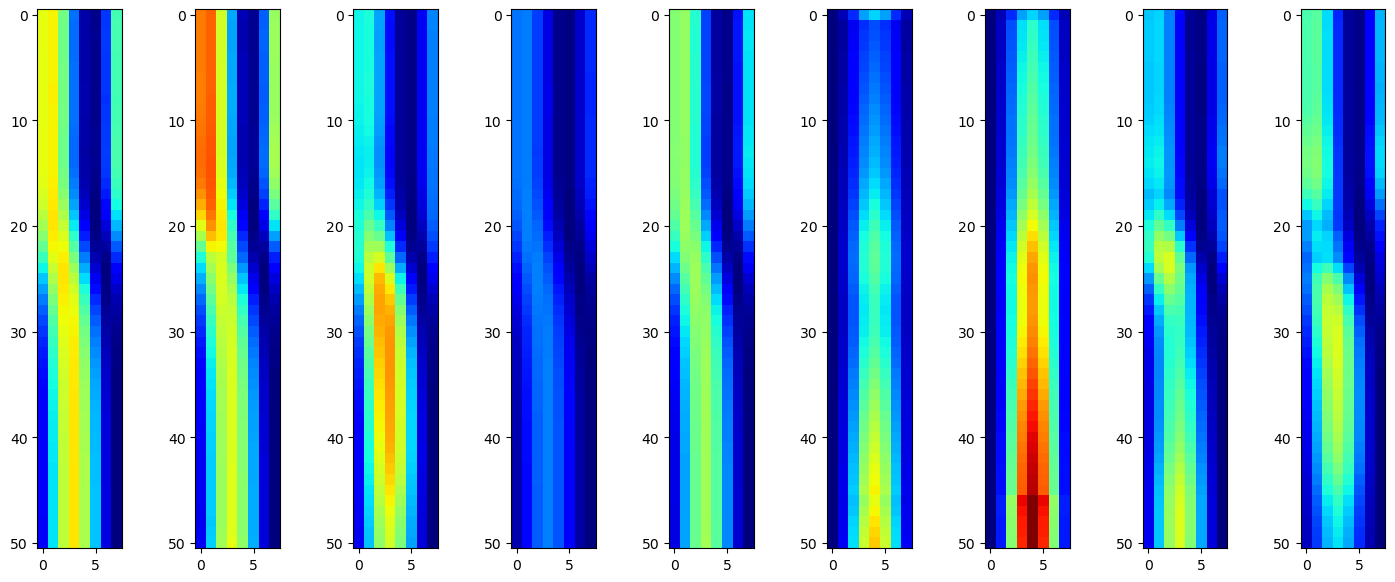

In [265]:
fig,ax = plt.subplots(1,9,figsize=(18,7))
ax[0].imshow(PFN_list[n].iloc[:,EPG_start:EPG_end],cmap='jet',vmin=0,vmax=1.5)
ax[1].imshow(PFN_list[n].iloc[:,PFNd_start:PFNd_start+8],cmap='jet',vmin=0,vmax=1.5)
ax[2].imshow(PFN_list[n].iloc[:,PFNd_end-8:PFNd_end],cmap='jet',vmin=0,vmax=1.5)
ax[3].imshow(PFN_list[n].iloc[:,PFNv_start:PFNv_start+8],cmap='jet',vmin=0,vmax=1.5)
ax[4].imshow(PFN_list[n].iloc[:,PFNv_end-8:PFNv_end],cmap='jet',vmin=0,vmax=1.5)
ax[5].imshow(PFN_list[n].iloc[:,PFNpc_start:PFNpc_start+8],cmap='jet',vmin=0,vmax=1.5)
ax[6].imshow(PFN_list[n].iloc[:,PFNpc_end-8:PFNpc_end],cmap='jet',vmin=0,vmax=1.5)
ax[7].imshow(PFN_list[n].iloc[:,PFNa_start:PFNa_start+8],cmap='jet',vmin=0,vmax=1.5)
ax[8].imshow(PFN_list[n].iloc[:,PFNa_end-8:PFNa_end],cmap='jet',vmin=0,vmax=1.5)
plt.savefig('example_trajectory_PFNs_real-wvg-like_no'+str(n)+'.svg')